In [1]:
#Importing Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

In [2]:
#Importing dataset
df= pd.read_excel("covid_19_india.xlsx")

In [3]:
df.head(10)


,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,18:00:00,Kerala,1,0,0,0,1
1,2,2020-01-31,18:00:00,Kerala,1,0,0,0,1
2,3,2020-02-01,18:00:00,Kerala,2,0,0,0,2
3,4,2020-02-02,18:00:00,Kerala,3,0,0,0,3
4,5,2020-02-03,18:00:00,Kerala,3,0,0,0,3
5,6,2020-02-04,18:00:00,Kerala,3,0,0,0,3
6,7,2020-02-05,18:00:00,Kerala,3,0,0,0,3
7,8,2020-02-06,18:00:00,Kerala,3,0,0,0,3
8,9,2020-02-07,18:00:00,Kerala,3,0,0,0,3
9,10,2020-02-08,18:00:00,Kerala,3,0,0,0,3


In [4]:
df.shape

(15806, 9)

In [5]:
# Getting the concise information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15806 entries, 0 to 15805
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       15806 non-null  int64         
 1   Date                      15806 non-null  datetime64[ns]
 2   Time                      15806 non-null  object        
 3   State                     15806 non-null  object        
 4   ConfirmedIndianNational   15806 non-null  object        
 5   ConfirmedForeignNational  15806 non-null  object        
 6   Cured                     15806 non-null  int64         
 7   Deaths                    15806 non-null  int64         
 8   Confirmed                 15806 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,15806.000000,1.580600e+04,15806.000000,1.580600e+04
mean,7903.500000,1.986514e+05,3004.846324,2.204181e+05
std,4562.943513,4.299306e+05,7919.358996,4.781429e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3952.250000,2.082000e+03,15.000000,3.291250e+03
50%,7903.500000,2.293950e+04,385.000000,2.927950e+04
75%,11854.750000,2.208698e+05,2690.500000,2.472700e+05
max,15806.000000,5.564348e+06,100470.000000,5.842000e+06


In [7]:
#Checking Blankvalues
df.isnull()


,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
15801,False,False,False,False,False,False,False,False,False
15802,False,False,False,False,False,False,False,False,False
15803,False,False,False,False,False,False,False,False,False
15804,False,False,False,False,False,False,False,False,False


In [8]:
#Formating time
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

In [9]:
#Checking duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15801    False
15802    False
15803    False
15804    False
15805    False
Length: 15806, dtype: bool

Dropping some unwanted columns to avoid confusion and large amount of datas

In [10]:
df.drop(["Sno", "Time"], inplace = True, axis = 1)


In [11]:
df.head()

,Date,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,1,0,0,0,1
1,2020-01-31,Kerala,1,0,0,0,1
2,2020-02-01,Kerala,2,0,0,0,2
3,2020-02-02,Kerala,3,0,0,0,3
4,2020-02-03,Kerala,3,0,0,0,3


Creating a new column for Active cases
Confirmed pateints who are neither dead or cured comes under active cases

In [12]:
df["Active"] = df["Confirmed"] - (df["Cured"] + df["Deaths"])

In [13]:
df.tail(10)

,Date,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active
15796,2021-06-08,Puducherry,-,-,100377,1638,109561,7546
15797,2021-06-08,Punjab,-,-,545674,15160,580829,19995
15798,2021-06-08,Rajasthan,-,-,922544,8687,946975,15744
15799,2021-06-08,Sikkim,-,-,12846,273,17170,4051
15800,2021-06-08,Tamil Nadu,-,-,1997299,27356,2256681,232026
15801,2021-06-08,Telangana,-,-,564303,3394,593103,25406
15802,2021-06-08,Tripura,-,-,49579,572,56169,6018
15803,2021-06-08,Uttarakhand,-,-,313566,6731,334419,14122
15804,2021-06-08,Uttar Pradesh,-,-,1662069,21333,1699083,15681
15805,2021-06-08,West Bengal,-,-,1388771,16362,1432019,26886


In [14]:
#Getting Number of Active cases per state
active_cases = df.groupby('State')['Active'].sum().reset_index()


In [15]:
active_cases

,State,Active
0,Andaman and Nicobar Islands,60484
1,Andhra Pradesh,16480738
2,Arunachal Pradesh,346530
3,Assam,4958742
4,Bihar,5909958
5,Cases being reassigned to states,345565
6,Chandigarh,582485
7,Chhattisgarh,9720500
8,Dadra and Nagar Haveli,362
9,Dadra and Nagar Haveli and Daman and Diu,93064


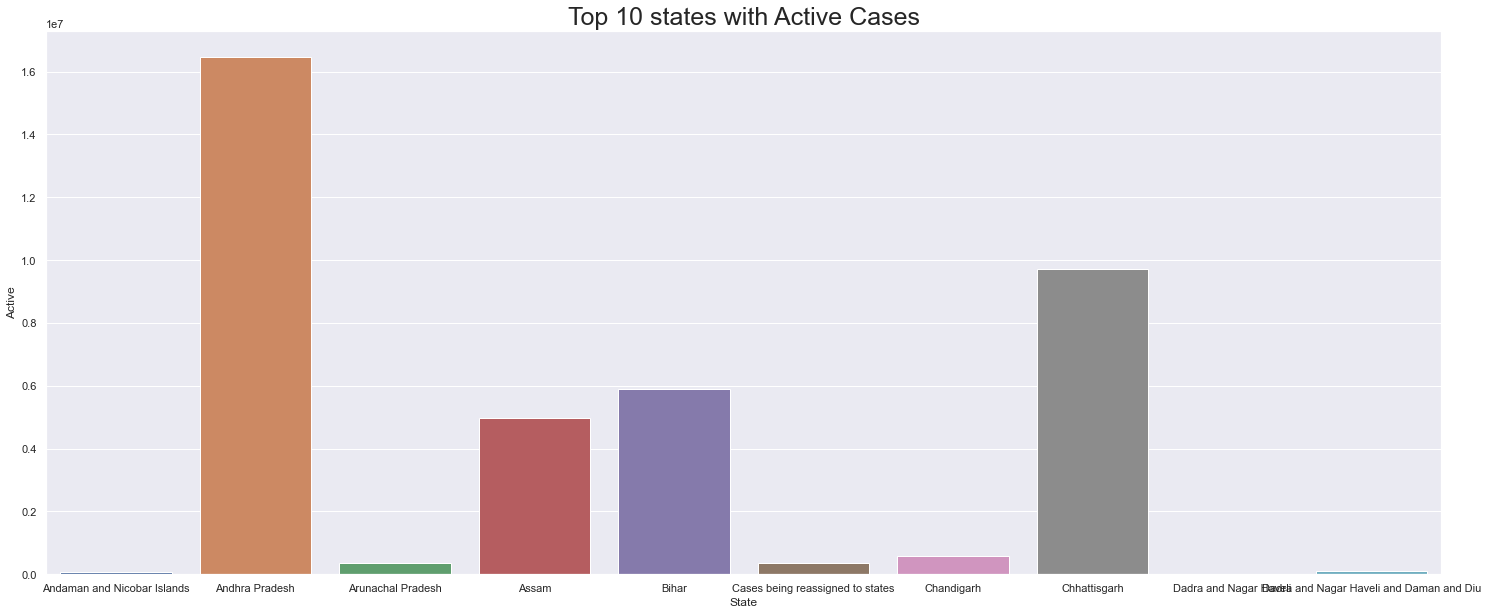

In [17]:
# Ploting top 10 states that has maximum active cases

# Setting figure size
fig = plt.figure(figsize = (25, 10))

# Plot title
plt.title("Top 10 states with Active Cases", size = 25)

# Creating Barplot
ax = sns.barplot(data = active_cases.iloc[:10], y = "Active", x = "State")

In [18]:
# Extracting confirmed cases by state wise for each day
confirmed_cases = df.groupby(['Date', 'State'])['Confirmed'].sum().reset_index()


In [19]:
confirmed_cases

,Date,State,Confirmed
0,2020-01-30,Kerala,1
1,2020-01-31,Kerala,1
2,2020-02-01,Kerala,2
3,2020-02-02,Kerala,3
4,2020-02-03,Kerala,3
...,...,...,...
15801,2021-06-08,Telangana,593103
15802,2021-06-08,Tripura,56169
15803,2021-06-08,Uttar Pradesh,1699083
15804,2021-06-08,Uttarakhand,334419


In [20]:
# Extract confirmed cases by state wise 
confirmed_cases_statewise = df.groupby('State')['Confirmed'].sum().reset_index()

In [21]:
confirmed_cases_statewise

,State,Confirmed
0,Andaman and Nicobar Islands,1461311
1,Andhra Pradesh,270440364
2,Arunachal Pradesh,4619157
3,Assam,66322683
4,Bihar,87441641
5,Cases being reassigned to states,345565
6,Chandigarh,6910907
7,Chhattisgarh,100013893
8,Dadra and Nagar Haveli,20722
9,Dadra and Nagar Haveli and Daman and Diu,1261966


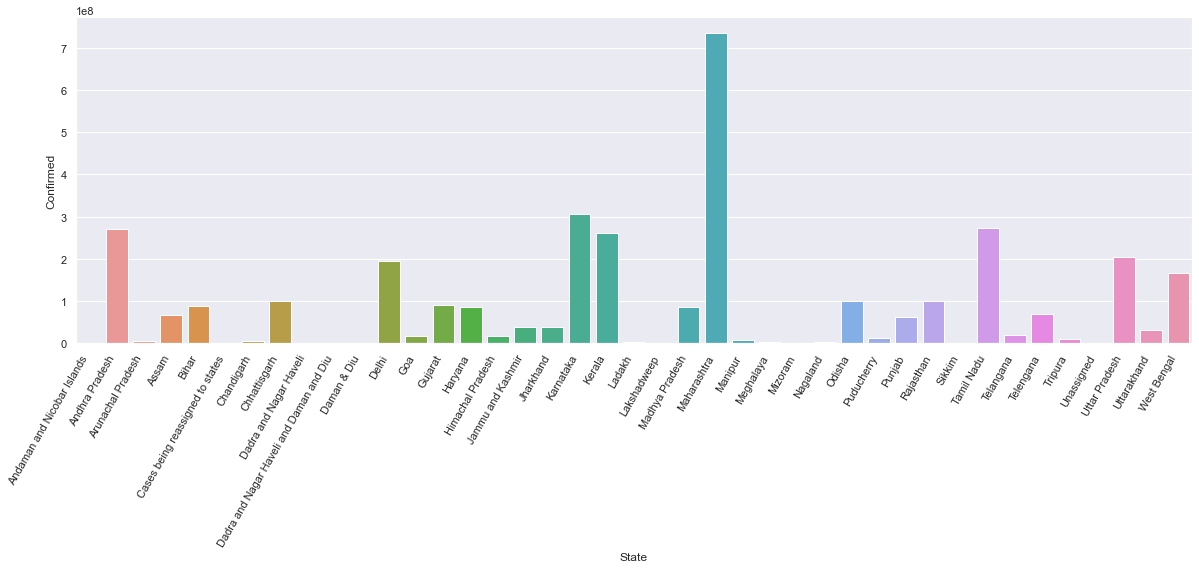

In [23]:
# Setting figure size
fig = plt.figure(figsize = (20, 6))

# Creating bar plot
ax = sns.barplot(data = confirmed_cases_statewise, y = "Confirmed", x = "State")

# Rotate x-axis labels to avoid overlapping
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")

# Display the plot
plt.show()

Exporting the DataFrame to a CSV file:


In [24]:
confirmed_cases.to_csv('confirmed_cases.csv', index=False)

Creating a report of total deaths state wise in the descending order


In [25]:
total_deaths = df.groupby('State')['Deaths'].sum().reset_index().sort_values('Deaths', ascending=False)

In [26]:
total_deaths

,State,Deaths
23,Maharashtra,15930618
18,Karnataka,3832006
33,Tamil Nadu,3827295
11,Delhi,3344735
40,West Bengal,2712221
38,Uttar Pradesh,2703716
1,Andhra Pradesh,2117572
30,Punjab,1758014
13,Gujarat,1575948
7,Chhattisgarh,1202925


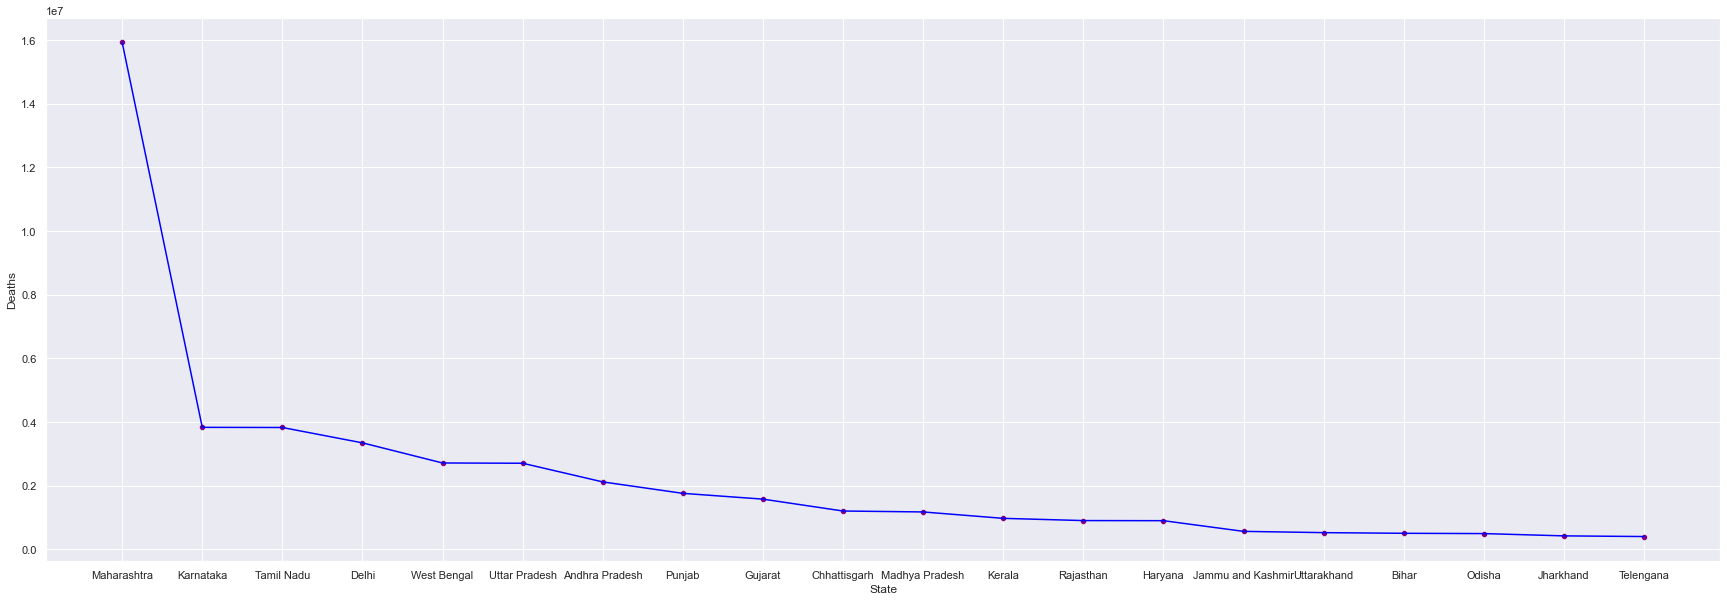

In [32]:
# Setting figure size
fig = plt.figure(figsize = (30, 10))

# Creating Line plot
ax = sns.lineplot(data = total_deaths.iloc[:20], y = "Deaths", x = "State", color='blue')

#Creating a Scattering plot for points visibility
sns.scatterplot(data = total_deaths.iloc[:20], y = "Deaths", x = "State", color='purple')

# Display the plot
plt.show()

In [33]:
# Extracting Total Deaths CSV
total_deaths.to_csv('total_deaths.csv', index=False)

States with less Cure

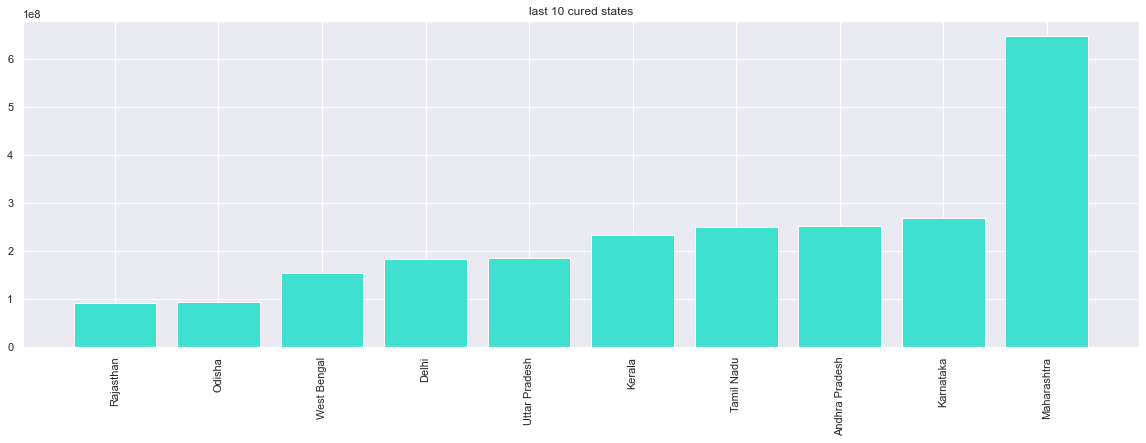

In [34]:
# Setting figure size
plt.figure(figsize=(20, 6))

#Extracting the states with least cure rate
last_10_states = df.groupby('State')['Cured'].sum().reset_index().sort_values('Cured').tail(10)

# Creating bar plot
plt.bar(last_10_states['State'], last_10_states['Cured'], color='Turquoise')

# plot title
plt.title("last 10 cured states")

# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Display the plot
plt.show()

Creating a report of consolidated data for all states by month.

In [35]:
df['Month'] = df['Date'].dt.month
consolidated_data = df.groupby(['Month', 'State'])[['Confirmed', 'Deaths']].sum().reset_index()
consolidated_data

,Month,State,Confirmed,Deaths
0,1,Andaman and Nicobar Islands,154187,1922
1,1,Andhra Pradesh,27448884,221186
2,1,Arunachal Pradesh,520415,1736
3,1,Assam,6718515,33089
4,1,Bihar,7952001,44922
...,...,...,...,...
431,12,Telengana,8646516,46521
432,12,Tripura,1024869,11710
433,12,Uttar Pradesh,17564562,250784
434,12,Uttarakhand,2579458,42515


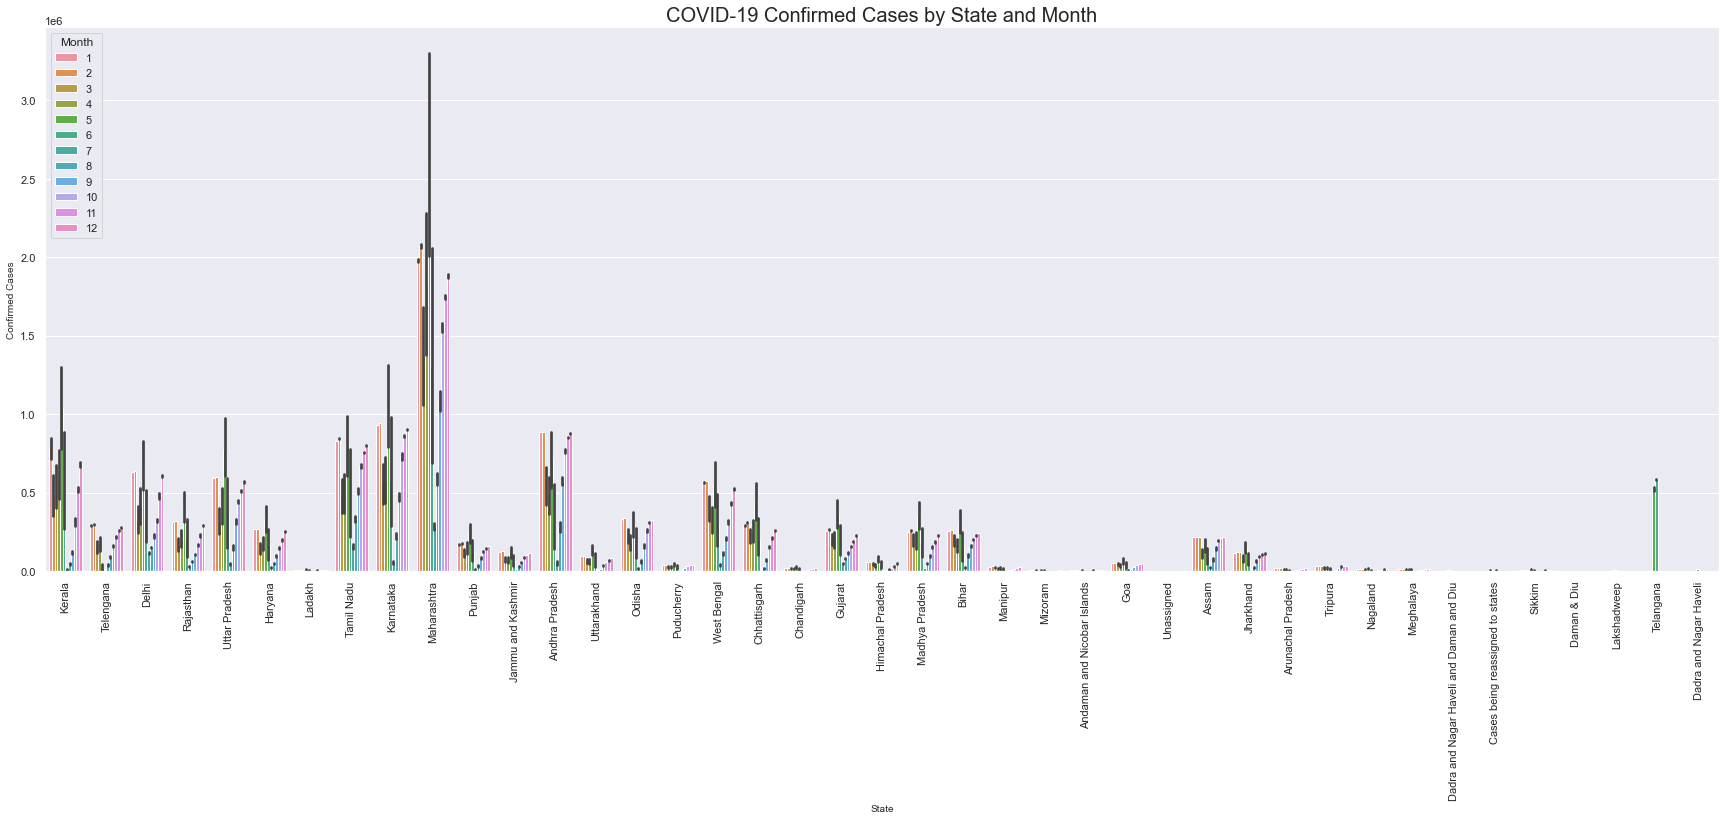

In [36]:
# Setting figure size
plt.figure(figsize=(30, 10))

# Creating bar plot
sns.barplot(x="State", y="Confirmed", hue="Month", data=df)

# plot title and labels
plt.title("COVID-19 Confirmed Cases by State and Month", size=20)
plt.xlabel("State", size=10)
plt.ylabel("Confirmed Cases", size=10)

# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [37]:
# Extracting a report of consolidated data for all states by month in csv format
consolidated_data.to_csv('consolidated_data.csv', index=False)


#### Done! Thankyou